In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv(r'C:\Users\panov\Desktop\Games.csv')

### Primary data viewing. We look at whether the data was opened correctly, we look at general information, data types, omissions.

In [34]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [35]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [37]:
df.shape

(175, 7)

In [38]:
df.describe(include = "all")

,Name,Sales,Series,Release,Genre,Developer,Publisher
count,175,175.000000,139,175,175,175,175
unique,175,NaN,91,130,61,109,96
top,PlayerUnknown's Battlegrounds,NaN,Command & Conquer,Mar-04,Real-time strategy,Blizzard Entertainment,Electronic Arts
freq,1,NaN,5,4,24,8,19
mean,NaN,3.141143,NaN,NaN,NaN,NaN,NaN
std,NaN,4.960513,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [39]:
df.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

### We see that there are missing values. Replace these values with a custom one

In [40]:
df['Series'].fillna('Unknown', inplace = True)

In [41]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,May-11,Action-adventure,Re-Logic,Re-Logic


In [42]:
df.isna().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

### The release date is incorrect, let's fix it.

In [43]:
df['Release']=pd.to_datetime(df['Release'],format='%b-%y')

In [44]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [45]:
df['Release'] = df['Release'].dt.strftime('%Y-%m')

In [46]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05,Action-adventure,Re-Logic,Re-Logic


### The data is ready, let's move on to analytics. To begin with, let's define the most popular genres

In [67]:
populars = (df.groupby(['Genre'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False))

In [71]:
populars


,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


In [66]:
(df.groupby(['Genre'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False))

,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


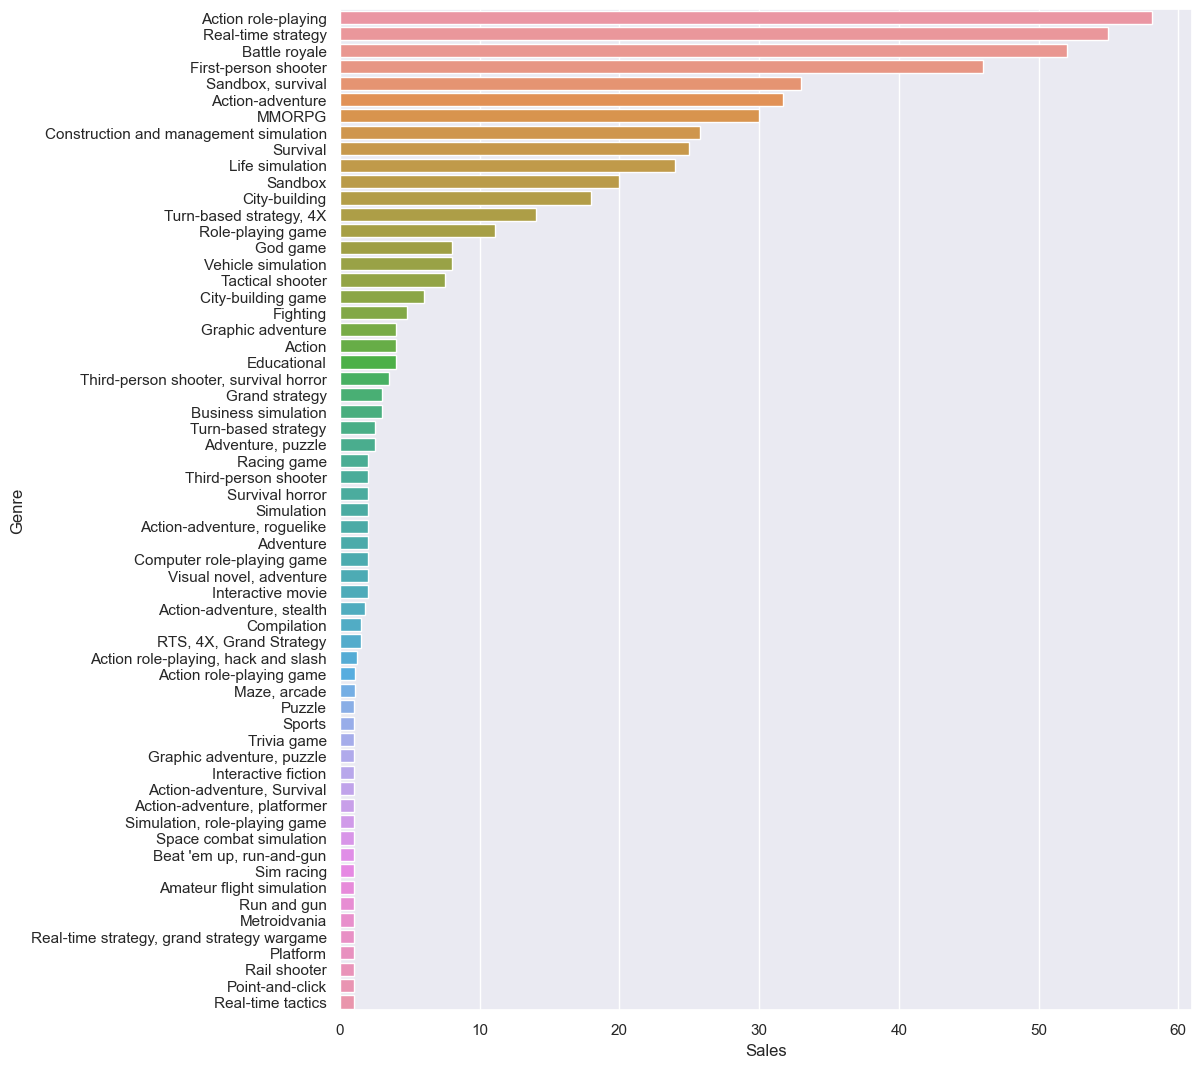

In [121]:
sns.barplot(x = 'Sales', y = 'Genre', data = populars)
sns.set(rc={'figure.figsize':(11,14)})

